In [40]:
#Set mode="wb" as an argument in download.file
download.file("http://s3.amazonaws.com/assets.datacamp.com/course/credit-risk-modeling-in-r/Loandata_startcourse.rds", mode="wb", destfile="loan_data.rds")
loan_data <- readRDS("loan_data.rds")
loan_data$loan_status <- as.factor(loan_data$loan_status)
                     

In [41]:
#Exploring the credit data
# View the structure of loan_data
str(loan_data)

# Load the gmodels package 
library(gmodels)

# Call CrossTable() on loan_status
CrossTable (loan_data$loan_status)

# Call CrossTable() on grade and loan_status
#We only want row-wise proportions, so set prop.r to TRUE, but prop.c , prop.t and prop.chisq to FALSE (default values here are TRUE, and this would lead to inclusion of column proportions, table proportions and chi-square contributions for each cell. We do not need these here.)
CrossTable (x=loan_data$grade, y=loan_data$loan_status, prop.r = TRUE, prop.c = FALSE, prop.t = FALSE, prop.chisq = FALSE)


'data.frame':	29092 obs. of  8 variables:
 $ loan_status   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 2 1 ...
 $ loan_amnt     : int  5000 2400 10000 5000 3000 12000 9000 3000 10000 1000 ...
 $ int_rate      : num  10.6 NA 13.5 NA NA ...
 $ grade         : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 1 5 2 3 2 2 4 ...
 $ emp_length    : int  10 25 13 3 9 11 0 3 3 0 ...
 $ home_ownership: Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 4 4 4 3 4 4 4 4 ...
 $ annual_inc    : num  24000 12252 49200 36000 48000 ...
 $ age           : int  33 31 24 39 24 28 22 22 28 22 ...

 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  29092 

 
          |         0 |         1 | 
          |-----------|-----------|
          |     25865 |      3227 | 
          |     0.889 |     0.111 | 
          |-----------|-----------|



 

 
   Cell Contents
|-------------------------|
|            

 [1]     0  2000  4000  6000  8000 10000 12000 14000 16000 18000 20000 22000
[13] 24000 26000 28000 30000 32000 34000 36000


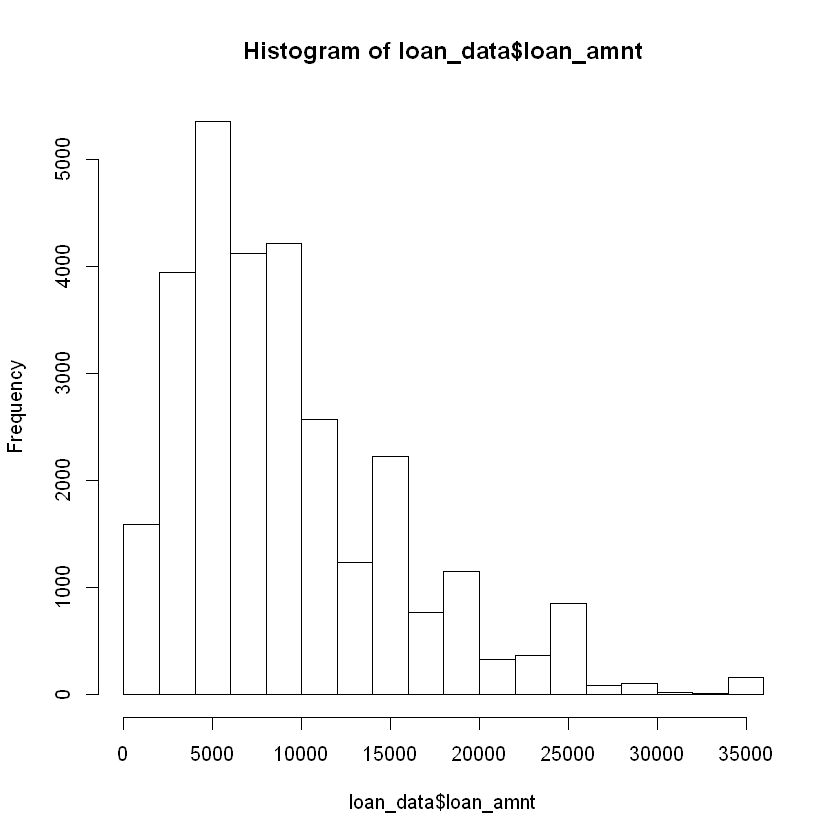

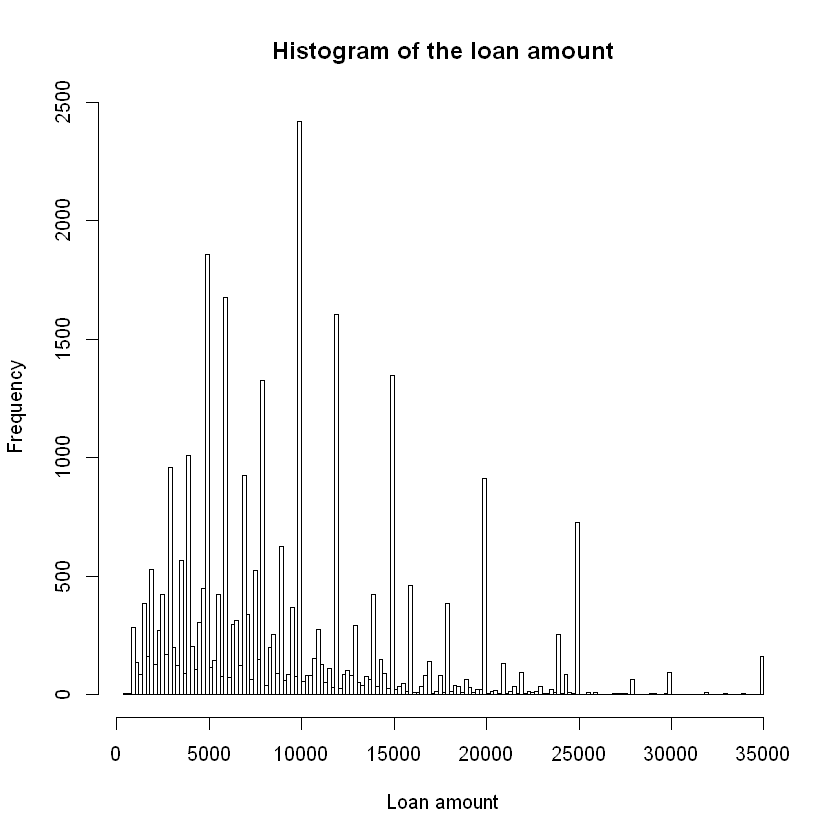

In [42]:
#Histograms
# Create histogram of loan_amnt: hist_1
hist_1 = hist(loan_data$loan_amnt)

# Print locations of the breaks in hist_1
print (hist_1$breaks)

# Change number of breaks and add labels: hist_2
hist_2 <- hist(loan_data$loan_amnt, breaks = 200, xlab = "Loan amount", 
               main = "Histogram of the loan amount")


'''
The person with the huge annual wage of $6 million appeared to be 144 years old. 
This must be a mistake, so you will definitely delete this observation from the data later.
'''

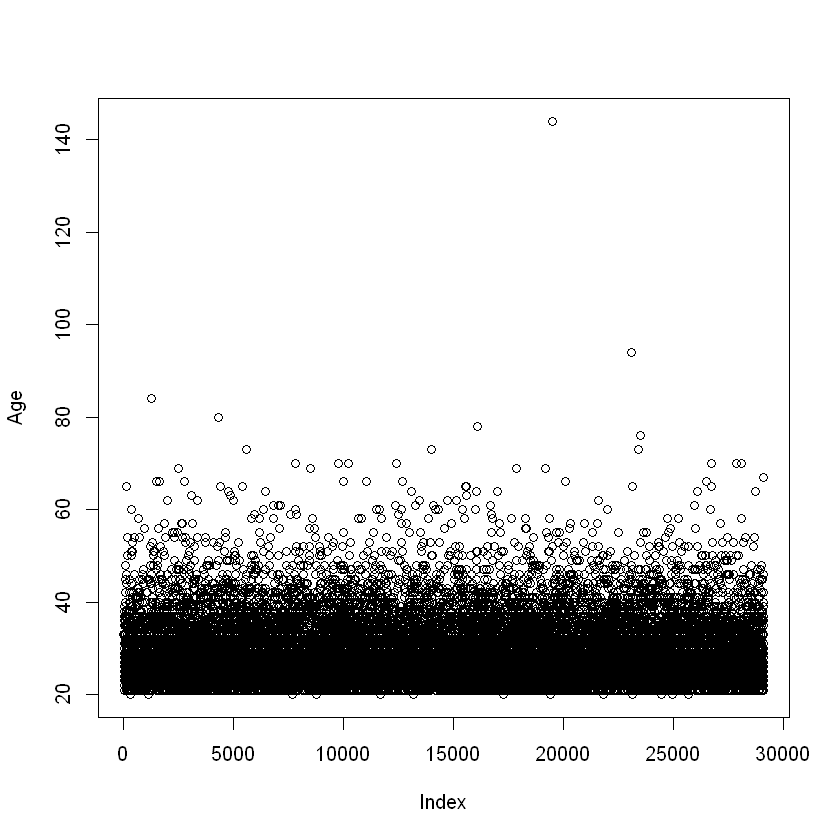

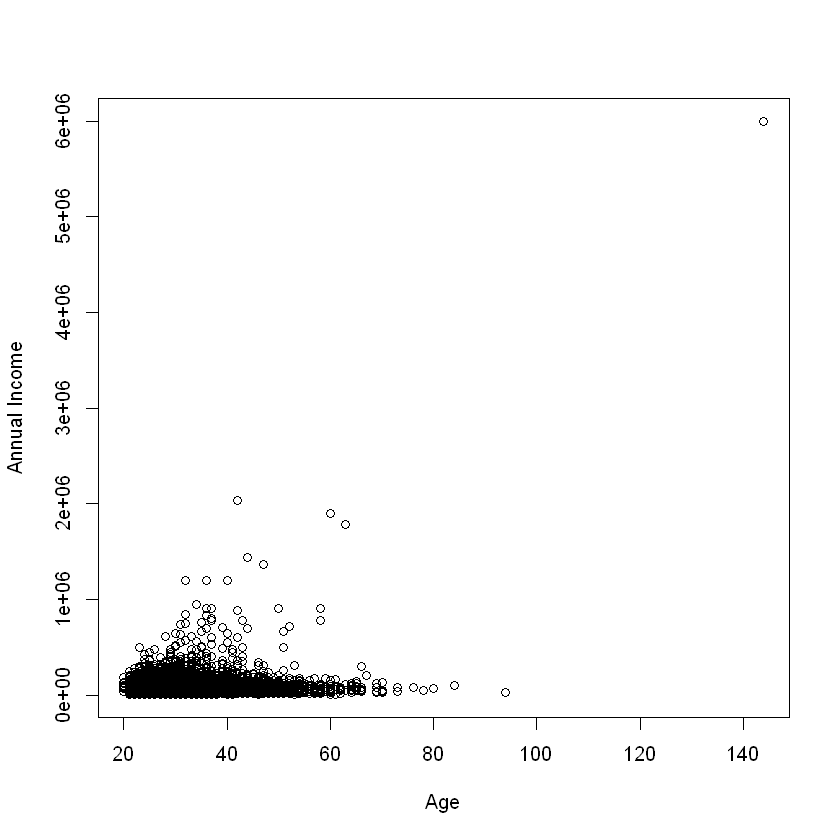

In [43]:
#Outliers

# Plot the age variable
plot (loan_data$age, ylab = "Age")

# Save the outlier's index to index_highage
index_highage <- which (loan_data$age >122)

# Create data set new_data with outlier deleted
new_data <- loan_data[-index_highage, ]

# Make bivariate scatterplot of age and annual income
plot(loan_data$age, loan_data$annual_inc, xlab = "Age", ylab = "Annual Income")

In [44]:
#Deleting missing data
# Look at summary of loan_data
summary (loan_data$int_rate)

# Get indices of missing interest rates: na_index
na_index <- which (is.na(loan_data$int_rate))

# Remove observations with missing interest rates: loan_data_delrow_na
loan_data_delrow_na <- loan_data[-na_index, ]

# Make copy of loan_data
loan_data_delcol_na <- loan_data

# Delete interest rate column from loan_data_delcol_na
loan_data_delcol_na$int_rate <- NULL

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.42    7.90   10.99   11.00   13.47   23.22    2776 

In [45]:
#Replacing missing data
# Compute the median of int_rate
#na.rm = TRUE excludes missing values from analyses. For more info https://www.statmethods.net/input/missingdata.html
median_ir <- median (loan_data$int_rate, na.rm = TRUE)

# Make copy of loan_data
loan_data_replace <- loan_data

# Replace missing interest rates with median
loan_data_replace$int_rate[na_index] <- median_ir

# Check if the NAs are gone
summary (loan_data_replace$int_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.42    8.49   10.99   11.00   13.11   23.22 


'''
In some situations, the fact that an input is missing is important information in itself. 
NAs can be kept in a separate "missing" category using coarse classification.

Coarse classification allows you to simplify your data and improve the interpretability of your model. 
Coarse classification requires you to bin your responses into groups that contain ranges of values. 
You can use this binning technique to place all NAs in their own bin.
'''



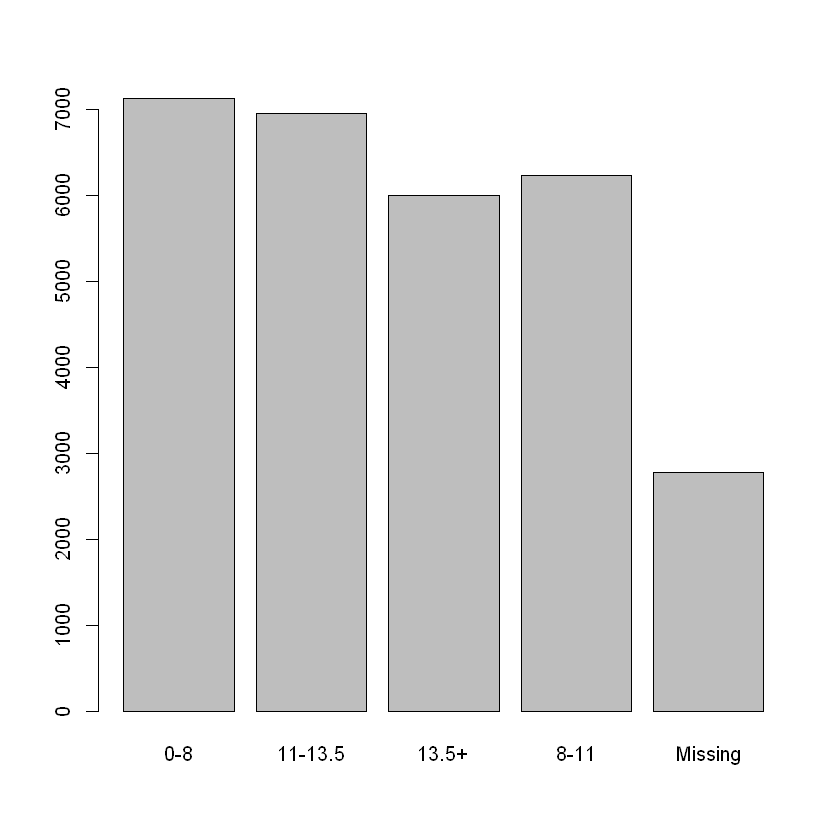

In [46]:
#Keeping missing data
download.file("http://s3.amazonaws.com/assets.datacamp.com/course/credit-risk-modeling-in-r/Loandata_startcourse.rds", mode = 'wb', destfile="loan_data.rds")
loan_data <- readRDS("loan_data.rds")

index_highage <- which(loan_data$age > 100)
loan_data <- loan_data[-index_highage, ]
loan_data$loan_status <- as.factor(loan_data$loan_status)

loan_data$emp_cat <- rep(NA, length(loan_data$emp_length))
loan_data$emp_cat[which(loan_data$emp_length<=15)] <- '0-15'
loan_data$emp_cat[which(loan_data$emp_length>15 & loan_data$emp_length<=30)] <- '15-30'
loan_data$emp_cat[which(loan_data$emp_length>30 & loan_data$emp_length<=45)] <- '30-45'
loan_data$emp_cat[which(loan_data$emp_length>45)] <- '45+'
loan_data$emp_cat[which(is.na(loan_data$emp_length))] <- 'Missing'
loan_data$emp_cat <- as.factor(loan_data$emp_cat)
loan_data$emp_length <- NULL

loan_data$ir_cat <- rep(NA, length(loan_data$int_rate))

loan_data$ir_cat[which(loan_data$int_rate <= 8)] <- "0-8"
loan_data$ir_cat[which(loan_data$int_rate > 8 & loan_data$int_rate <= 11)] <- "8-11"
loan_data$ir_cat[which(loan_data$int_rate > 11 & loan_data$int_rate <= 13.5)] <- "11-13.5"
loan_data$ir_cat[which(loan_data$int_rate > 13.5)] <- "13.5+"
loan_data$ir_cat[which(is.na(loan_data$int_rate))] <- "Missing"

loan_data$ir_cat <- as.factor(loan_data$ir_cat)

# Look at your new variable using plot()
plot (loan_data$ir_cat)

Data splitting and confusion matrices

Using sample(), you can randomly assign observations to the training and test set.

The first argument is the vector from which we will sample values. We will randomly pick row numbers as indices; use 1:nrow(loan_data) to create the vector of row numbers.

The second argument is the number of items to choose. Enter 2 / 3 * nrow(loan_data), as we construct the training set first.

In [47]:

#Splitting the data set

# Set seed of 567
set.seed (567)

# Store row numbers for training set: index_train
index_train <- sample(1:nrow(loan_data), 2 / 3 * nrow(loan_data))

# Create training set: training_set
training_set <- loan_data[index_train, ]

# Create test set: test_set
test_set <- loan_data[-index_train, ]


In [48]:
#Creating a confusion matrix
download.file("http://s3.amazonaws.com/assets.datacamp.com/course/credit-risk-modeling-in-r/Loandata_startcourse.rds", mode = "wb", destfile = "loan_data.rds")
loan_data <- readRDS("loan_data.rds")

index_highage <- which(loan_data$age > 100)
loan_data <- loan_data[-index_highage, ]
loan_data$loan_status <- as.factor(loan_data$loan_status)
loan_data$emp_cat = rep(NA, length(loan_data$emp_length))
loan_data$emp_cat[which(loan_data$emp_length <= 15)] = '0-15'
loan_data$emp_cat[which(loan_data$emp_length > 15 & loan_data$emp_length <= 30)] = '15-30'
loan_data$emp_cat[which(loan_data$emp_length > 30 & loan_data$emp_length <= 45)] = '30-45'
loan_data$emp_cat[which(loan_data$emp_length > 45)] = '45+'
loan_data$emp_cat[which(is.na(loan_data$emp_length))] = 'Missing'
loan_data$emp_cat <- as.factor(loan_data$emp_cat)
loan_data$emp_length = NULL

loan_data$ir_cat = rep(NA, length(loan_data$int_rate))
loan_data$ir_cat[which(loan_data$int_rate <= 8)] = '0-8'
loan_data$ir_cat[which(loan_data$int_rate > 8 & loan_data$int_rate <= 11)] = '8-11'
loan_data$ir_cat[which(loan_data$int_rate > 11 & loan_data$int_rate <= 13.5)] = '11-13.5'
loan_data$ir_cat[which(loan_data$int_rate > 13.5)] = '13.5+'
loan_data$ir_cat[which(is.na(loan_data$int_rate))] = 'Missing'
loan_data$ir_cat <- as.factor(loan_data$ir_cat)
loan_data$int_rate = NULL

set.seed(567)
index_train <- sample(1:nrow(loan_data), 2 / 3 * nrow(loan_data))
training_set <- loan_data[index_train, ]
test_set <- loan_data[-index_train, ]

set.seed(567)

#assume that you have run a model and stored the predicted outcomes in a vector called model_pred
model_pred <- rbinom(nrow(test_set), 1, 0.3)

# Create confusion matrix
conf_matrix <- table(test_set$loan_status, model_pred)

# Compute classification accuracy
(6092 + 349) / nrow(test_set)

# Compute sensitivity
349 / 1037

[1] 0.664226

[1] 0.3365477